In [1]:
# ref : https://github.com/krasserm/bayesian-machine-learning

import numpy as np 
import pandas as pd
import sklearn.gaussian_process as gp_sklearn

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from scipy.optimize import minimize
from sklearn.datasets import make_moons

from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from scipy.stats import bernoulli
from scipy.special import expit as sigmoid
from sklearn.datasets import make_moons, make_classification
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.gaussian_process.kernels import DotProduct,Matern, RationalQuadratic, WhiteKernel
from sklearn.metrics import classification_report



# Gaussian process 

In [2]:
dataset = pd.read_csv('smart_grid_stability_augmented.csv')
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
dataset.replace({'stabf': {'unstable':0, 'stable':1}}, inplace=True)
dataset.drop(columns=['stab'])

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,0
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,1
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,1
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,0


In [4]:
x = dataset.iloc[:, :12]
y = dataset['stabf']
x = x.to_numpy()
y = y.to_numpy()
X_test= x[len(x)-1000:len(x)+1000]
t_test=y[len(x)-1000:len(x)+1000]

In [5]:
rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpc = GaussianProcessClassifier(kernel=rbf)

X= x[1000:2000]
t=y[1000:2000]

gpc.fit(X, t.ravel())
y_pred = gpc.predict(X_test)

print("Accuracy :", accuracy_score(t_test, y_pred))


# Obtain optimized kernel parameters
#sklearn_theta_0 = gpc.kernel_.k2.get_params()['length_scale']
#sklearn_theta_1 = np.sqrt(gpc.kernel_.k1.get_params()['constant_value'])

#print(f'Optimized theta = [{sklearn_theta_0:.3f}, {sklearn_theta_1:.3f}], negative log likelihood = {-gpc.log_marginal_likelihood_value_:.3f}')

Accuracy : 0.935


In [6]:
y_pred = gpc.predict(X_test)

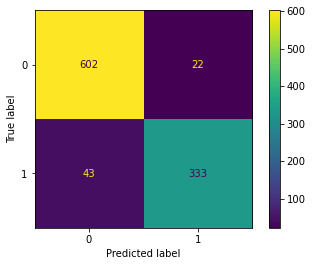

In [7]:


cm = confusion_matrix(t_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [47]:
accuracy_score(t_test, y_pred)

0.935

In [48]:
target_names = ['unstable', 'stable']
print(classification_report(t_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    unstable       0.93      0.96      0.95       624
      stable       0.94      0.89      0.91       376

    accuracy                           0.94      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.94      0.94      0.93      1000



In [92]:

# define dataset
#X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# define model
model = GaussianProcessClassifier()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
# define grid
grid = dict()
grid['kernel'] = [1*RBF(), 1*DotProduct(), 1*Matern(),  1*RationalQuadratic(), 1*WhiteKernel()]
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(x[:1000], y[:1000])
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Best Mean Accuracy: 0.937
Best Config: {'kernel': 1**2 * RationalQuadratic(alpha=1, length_scale=1)}
>0.628 with: {'kernel': 1**2 * RBF(length_scale=1)}
>nan with: {'kernel': 1**2 * DotProduct(sigma_0=1)}
>0.905 with: {'kernel': 1**2 * Matern(length_scale=1, nu=1.5)}
>0.937 with: {'kernel': 1**2 * RationalQuadratic(alpha=1, length_scale=1)}
>0.628 with: {'kernel': 1**2 * WhiteKernel(noise_level=1)}


In [49]:
rq = ConstantKernel(1.0) * RationalQuadratic(alpha=1, length_scale=1)
gpc = GaussianProcessClassifier(kernel=rq)


X= x[0:1000]
t=y[0:1000]

gpc.fit(X, t.ravel())
y_pred = gpc.predict(X_test)

print("Accuracy :", accuracy_score(t_test, y_pred))



Accuracy : 0.923


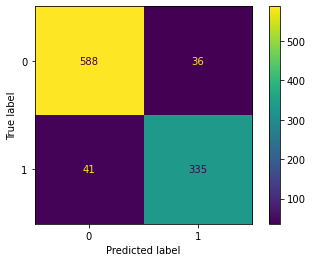

In [50]:

cm = confusion_matrix(t_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [52]:
target_names = ['unstable', 'stable']
print(classification_report(t_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    unstable       0.93      0.94      0.94       624
      stable       0.90      0.89      0.90       376

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



In [55]:
import GPy

In [56]:
display(gpc)

GaussianProcessClassifier(kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1))